LIBRARIES FOR LOGISTIC REGRESSIOB

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## SET THE COLOR THEME FOR SEABORN
sns.set_theme(color_codes=True)

# PANDAS DATA FRAME TO DISPLAY ALL COLUMNS
pd.set_option('display.max_columns',None)

# PANDAS DATA FRAME WITH 3 DECMIMAL PLACES
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# PANDAS DISPLAY WITH SET
pd.set_option('display.width', 500)

# SKLEARN LIBRARIES
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, RocCurveDisplay

IMPORT THE DATA SET - BANK-FULL.CSV

In [2]:
df = pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

TARGET IS A CATGORICAL VALUES OF 1 AND 0

In [5]:
# TO CHECK HOW MANY INSTANCES ARE THERE IN EACH CATEGORICAL CLASS
df["poutcome"].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

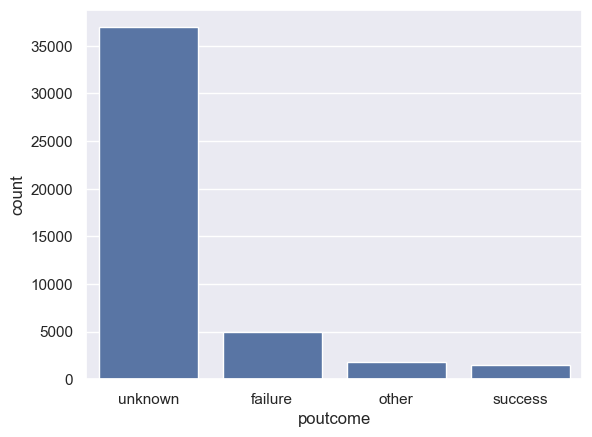

In [6]:
# VISUALIZE THE FREQUENCES USING COUNT PLOT METHOD IN SEABORN LIBRARY
sns.countplot(x="poutcome", data=df)
plt.show()

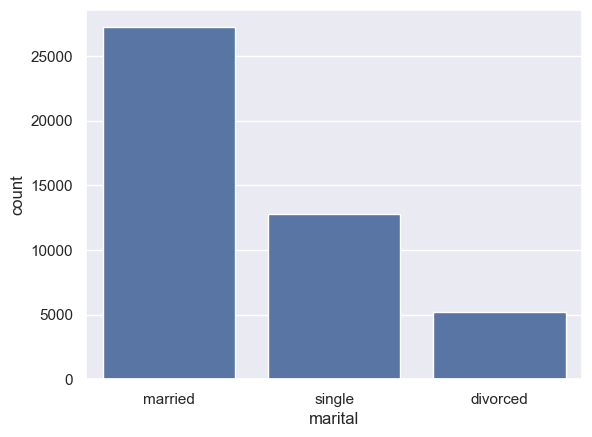

In [14]:
# TO CHECK HOW MANY INSTANCES ARE THERE IN EACH CATEGORICAL CLASS
df["marital"].value_counts()
# VISUALIZE THE FREQUENCES USING COUNT PLOT METHOD IN SEABORN LIBRARY
sns.countplot(x="marital", data=df)
plt.show(block=True)

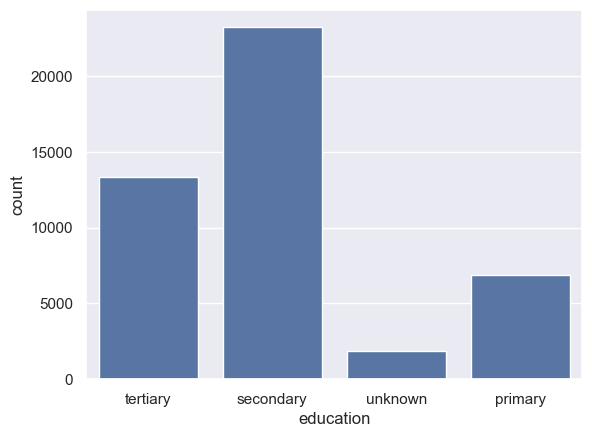

In [15]:
# TO CHECK HOW MANY INSTANCES ARE THERE IN EACH CATEGORICAL CLASS
df["education"].value_counts()
# VISUALIZE THE FREQUENCES USING COUNT PLOT METHOD IN SEABORN LIBRARY
sns.countplot(x="education", data=df)
plt.show(block=True)

In [7]:
# PROPORTION OF CLASS ONE AND ZERO ARE WHEN CONSIDERING THE ENTIRE DATA SET

# BY DIVIDING THE EXPRESSION BY THE SIZE OF THE DATA SET AND MULTIPLYING BY 100
100 * df["poutcome"].value_counts() / len(df)

poutcome
unknown   81.748
failure   10.840
other      4.070
success    3.342
Name: count, dtype: float64

In [8]:
# ANALYSE OUR INDEPENDENT VARIABLES
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.000,40.936,10.619,18.000,33.000,39.000,48.000,95.000
balance,45211.000,1362.272,3044.766,-8019.000,72.000,448.000,1428.000,102127.000
day,45211.000,15.806,8.322,1.000,8.000,16.000,21.000,31.000
duration,45211.000,258.163,257.528,0.000,103.000,180.000,319.000,4918.000
campaign,45211.000,2.764,3.098,1.000,1.000,2.000,3.000,63.000
pdays,45211.000,40.198,100.129,-1.000,-1.000,-1.000,-1.000,871.000
previous,45211.000,0.580,2.303,0.000,0.000,0.000,0.000,275.000


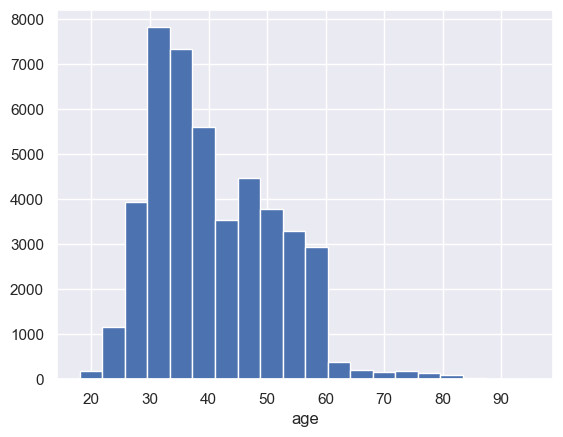

In [11]:
## HISTOGRAM ON AGE
df["age"].hist(bins=20)
plt.xlabel("age")
plt.show(block=True)

MODEL

In [41]:
df.shape

(45211, 17)

In [31]:
# Remove rows where y is NaN
df_clean = df[df['poutcome'].notna()]

In [32]:
# Target and features
X = df_clean.drop('poutcome', axis=1)
y = df_clean['poutcome'].map({'yes': 1, 'no': 0})  # Convert to binary

In [38]:
print(X.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64


In [40]:
print(y.isna().sum())

45211


In [33]:
# Identify feature types
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month']
binary_features = ['default', 'housing', 'loan']

In [26]:
# Preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features + binary_features)
    ])

In [34]:
# Build pipeline with Logistic Regression
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Fit model
clf.fit(X_train, y_train)

ValueError: Input y contains NaN.